League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.


In this project, I aim to build a model to predict which team is going to win, based on stats from the first 10 minutes.  To achieve this, we are using a dataset that only consists of games from Diamond and above rank. At this level, it is assumed that all players have intermediate/advanced knowledge about the game and their champions. 

Here are some terms that you may not know about if you do not play the game. <br>
Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.<br>
Minions: NPC that belong to both teams. They give gold when killed by players.<br>
Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.<br>
Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.<br>
Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.<br>
Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.<br>
Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.<br>
Level: Champion level. Start at 1. Max is 18.<br>

## This project's plan :
### <u> 1) Exploring our Dataset - Cleaning if necessary </u>
### 2) Analyzing our data  
### 3) Predicting which team to win.
### 4) References


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
main = pd.read_csv('dataset.csv', header = 0)
main.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
main.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [5]:
main.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

That's good. We don't have any NaN values in our dataset. Let's see if we can reduce the number of columns by removing what we do not plan on using.

In [6]:
df = main[['blueGoldDiff','blueExperienceDiff','redGoldDiff','redExperienceDiff']]
df

,blueGoldDiff,blueExperienceDiff,redGoldDiff,redExperienceDiff
0,643,-8,-643,8
1,-2908,-1173,2908,1173
2,-1172,-1033,1172,1033
3,-1321,-7,1321,7
4,-1004,230,1004,-230
...,...,...,...,...
9874,2519,2469,-2519,-2469
9875,782,888,-782,-888
9876,-2416,-1877,2416,1877
9877,-839,-1085,839,1085


As blue and red's gold/experience difference are mirroring each other, we can remove the columns for red team. 

In [7]:
main = main.drop(columns=['redGoldDiff','redExperienceDiff'])

Since we have the same stats for each team, it would be better to have new columns that show the difference between similar statistics. For example, we have <br> 
blueKills and redKills <br>
Let's use them to make a new column called KillsDifference. <br>
This way we can reduce the number of columns by a significant amount. 

In [8]:
for i in range(0,len(main)):
    # Vision 
    main.loc[i,'WardsPlacedDifference'] = main.loc[i,'blueWardsPlaced'] - main.loc[i,'redWardsPlaced']
    main.loc[i,'WardsDestroyedDifference'] = main.loc[i,'blueWardsDestroyed'] - main.loc[i,'redWardsDestroyed']
    
    # Neutral Objectives 
    main.loc[i,'DragonDifference'] = main.loc[i,'blueDragons'] - main.loc[i,'redDragons']
    main.loc[i,'HeraldDifference'] = main.loc[i,'blueHeralds'] - main.loc[i,'redHeralds']
    main.loc[i,'TowersDifference'] = main.loc[i,'blueTowersDestroyed'] - main.loc[i,'redTowersDestroyed']
    
    #Combat
    main.loc[i,'KillsDifference'] = main.loc[i,'blueKills'] - main.loc[i,'redKills']
    main.loc[i,'DeathDifference'] = main.loc[i,'blueDeaths'] - main.loc[i,'redDeaths']
    main.loc[i,'AssistDifference'] = main.loc[i,'blueAssists'] - main.loc[i,'redAssists']
    
    #Resources
    main.loc[i,'AvgLevelDifference'] = main.loc[i,'blueAvgLevel'] - main.loc[i,'redAvgLevel']
    main.loc[i,'TotalMinionsDifference'] = main.loc[i,'blueTotalMinionsKilled'] - main.loc[i,'redTotalMinionsKilled']
    main.loc[i,'JungleMinionDifference'] = main.loc[i,'blueTotalJungleMinionsKilled'] - main.loc[i,'redTotalJungleMinionsKilled']
    

In [9]:
main = main.drop(columns=['blueWardsPlaced','redWardsPlaced',
                    'blueWardsDestroyed','redWardsDestroyed',
                    'blueEliteMonsters','redEliteMonsters',
                    'redFirstBlood',
                   'blueDragons','redDragons',
                   'blueHeralds','redHeralds',
                   'blueTowersDestroyed','redTowersDestroyed',
                   'blueKills','redKills','blueDeaths','redDeaths','blueAssists','redAssists',
                   'blueAvgLevel','redAvgLevel',
                   'blueTotalMinionsKilled','redTotalMinionsKilled',
                   'blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled',
                   'blueCSPerMin','redCSPerMin',
                   'blueGoldPerMin','redGoldPerMin',
                   'blueTotalGold','redTotalGold',
                   'blueTotalExperience','redTotalExperience'
                    
                  ])

In [10]:
main

,gameId,blueWins,blueFirstBlood,blueGoldDiff,blueExperienceDiff,WardsPlacedDifference,WardsDestroyedDifference,DragonDifference,HeraldDifference,TowersDifference,KillsDifference,DeathDifference,AssistDifference,AvgLevelDifference,TotalMinionsDifference,JungleMinionDifference
0,4519157822,0,1,643,-8,13.0,-4.0,0.0,0.0,0.0,3.0,-3.0,3.0,-0.2,-2.0,-19.0
1,4523371949,0,0,-2908,-1173,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,3.0,-0.2,-66.0,-9.0
2,4521474530,0,0,-1172,-1033,0.0,-3.0,1.0,0.0,0.0,-4.0,4.0,-10.0,-0.4,-17.0,18.0
3,4524384067,0,0,-1321,-7,28.0,-1.0,0.0,1.0,0.0,-1.0,1.0,-5.0,0.0,-34.0,8.0
4,4436033771,0,0,-1004,230,58.0,2.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-15.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,1,2519,2469,-29.0,-1.0,1.0,0.0,0.0,3.0,-3.0,-2.0,0.4,-18.0,35.0
9875,4527797466,1,0,782,888,42.0,-21.0,1.0,0.0,0.0,2.0,-2.0,5.0,0.2,27.0,-8.0
9876,4527713716,0,0,-2416,-1877,9.0,1.0,-1.0,0.0,0.0,-1.0,1.0,-6.0,-0.4,-51.0,-15.0
9877,4527628313,0,1,-839,-1085,-52.0,0.0,1.0,0.0,0.0,-1.0,1.0,2.0,-0.6,-23.0,8.0


Now that we have the data we want , let's find out which variable affects win rate the most, and if we can build a model that allows us to predict which team wins using only information from the first 10 minutes!


### 1) Exploring our Dataset - Cleaning if necessary
### <u> 2) Analyzing our data </u> 
### 3) Using various methods to find variables that affect winning the most. 
### 4) Predicting which team to win.
### 5) References

Before analyzing data, let's see what our data is right now. <br>
blueWins - 0 if blue team loses , 1 if blue team wins. <br>
blueFirstBlood - 0 if blue team did not get the first kill. <br>
blueGoldDiff , blueExperienceDiff - Difference between blue team's gold and experience compared to red team. <br>
Wards - objects a team can put down for vision. They can be destroyed by the other team. <br>
Dragon - Neutral Objective. In the first 10 minutes, it is only possible to get 1 dragon. Dragons give extra gold and stat. <br>
Herald - Another objective to destroy towers. It is only possible to get 1 herald in the first 10 minutes. <br>
Minions - Tracking total number of Normal Minions + Jungle Monsters each team kills. 
Jungle Minions - Only jungle monsters.




Usually variables can be seperated into two types : Numerical and Categorical. <br> 
Some variables, which may only consist of 1 or 0, may look like numerical variables but actually they are categorical. Take for example, blueFirstBlood is either 0 or 1, which can mean whether did blue team secure the first kill or not. <br> 

Variables such as gold difference are examples of numerical variables. 

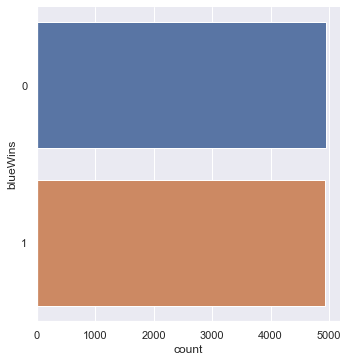

In [11]:
sb.catplot(y = 'blueWins', data = main, kind = "count")

In [12]:
countY, countX = main.blueWins.value_counts()
print("Ratio of blue team wins:losses = ", countY, ":", countX)

Ratio of blue team wins:losses =  4949 : 4930


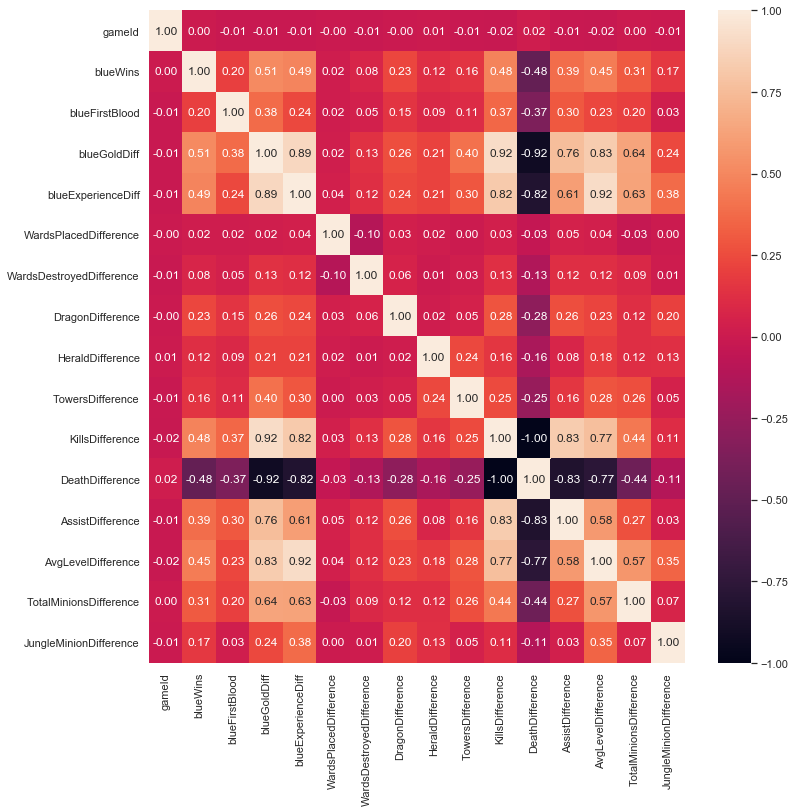

In [13]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(main.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

By plotting a correlation heatmap, we can easily see how each factor correlates to another factor. <br>
Note: Correlation IS NOT causation. Correlation indicates how likely a factor can change due to change in another factor. It does not mean that the factor WILL change. <br>

From the heatmap, we can see that gold difference, experience difference, kills, deaths, assists and average levels have the highest correlation. Total minions killed can also play a part as well. <br><br>

Surprisingly, wards placed and destroyed are low on the list, given how much emphasis is placed on vision in the game. Vision is important to scout out for potential enemies coming, or to see if they are on an objective. <br> <br>

Neutral objectives such as Dragon, Herald and Towers also have low values! Perhaps taking only the first 10 minutes was the cause of this, as teams can only obtain 1 dragon , herald and not many towers before the 10 minute mark. <br><br>

Jungle minions killed by each team also has a low correlation value. Perhaps most of the successful junglers are helping out their laners instead of farming the first 10 minutes, in order to gain a large lead?

<b>Feature Selection<b>
    
As we can see from the heatmap, kills and deaths difference have a correlation of -1. Thus, if we are building a model, we can exclude either one of the columns to prevent overfitting. 
    
We can also see that gold and experience difference have high correlation with kills, deaths and minions killed. This is granted as kills give gold and experience, which allows either team to get ahead. 
    



### 1) Exploring our Dataset - Cleaning if necessary 
### 2) Analyzing our data  

### 3) <u>Predicting which team to win.</u>
### 4) References

For predicting, let's use logistic regression. Logistic regression is used to model the probability of a certain class or event. <br>
Here we are using gold , experience , level and minions killed difference as our 'features'. 




In [14]:
main

,gameId,blueWins,blueFirstBlood,blueGoldDiff,blueExperienceDiff,WardsPlacedDifference,WardsDestroyedDifference,DragonDifference,HeraldDifference,TowersDifference,KillsDifference,DeathDifference,AssistDifference,AvgLevelDifference,TotalMinionsDifference,JungleMinionDifference
0,4519157822,0,1,643,-8,13.0,-4.0,0.0,0.0,0.0,3.0,-3.0,3.0,-0.2,-2.0,-19.0
1,4523371949,0,0,-2908,-1173,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,3.0,-0.2,-66.0,-9.0
2,4521474530,0,0,-1172,-1033,0.0,-3.0,1.0,0.0,0.0,-4.0,4.0,-10.0,-0.4,-17.0,18.0
3,4524384067,0,0,-1321,-7,28.0,-1.0,0.0,1.0,0.0,-1.0,1.0,-5.0,0.0,-34.0,8.0
4,4436033771,0,0,-1004,230,58.0,2.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-15.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,1,2519,2469,-29.0,-1.0,1.0,0.0,0.0,3.0,-3.0,-2.0,0.4,-18.0,35.0
9875,4527797466,1,0,782,888,42.0,-21.0,1.0,0.0,0.0,2.0,-2.0,5.0,0.2,27.0,-8.0
9876,4527713716,0,0,-2416,-1877,9.0,1.0,-1.0,0.0,0.0,-1.0,1.0,-6.0,-0.4,-51.0,-15.0
9877,4527628313,0,1,-839,-1085,-52.0,0.0,1.0,0.0,0.0,-1.0,1.0,2.0,-0.6,-23.0,8.0


In [15]:

from sklearn.model_selection import train_test_split


features = main[['blueGoldDiff','blueExperienceDiff','AvgLevelDifference','TotalMinionsDifference']]
label = main['blueWins']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

# create a simple, non-parameterized Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())


0.7272267206477733
Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Let's see if we can improve our model by using GridSearchCV.  <br> 
GridSearchCV essentially helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.



In [18]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of grid search 
# Penalty type 
penalty = ['l1', 'l2', 'elasticnet', 'none']
# Solver type 
solver = ['lbfgs', 'liblinear']
# Maximum number of iterations 
max_iter = [int(x) for x in np.linspace(start = 80, stop = 120, num = 5)]
# Multi class 
multi_class = ['auto', 'ovr']
# Verbosity 
verbose = [0, 1, 2]
# l1 ratio 
l1_ratio = [0, 0.8, 0.9, 1]
# C
C = [0.5, 0.75, 1.0, 1.25, 1.5]

# Create the param grid
param_grid = {'penalty': penalty, 'solver': solver, 'max_iter':max_iter, 
    'multi_class':multi_class, 'verbose':verbose, 'l1_ratio':l1_ratio, 
    'C':C
}
pprint(param_grid)

# Instantiate the grid search model with 2-fold cross-validation
log_grid_search = GridSearchCV(estimator = LogisticRegression(random_state=42), param_grid = param_grid, cv = 2, n_jobs = -1)

# Fit the grid search to the data
log_grid_search.fit(x_train, y_train)
best_log_grid = log_grid_search.best_estimator_
best_log_grid.fit(x_train, y_train)
y_pred_best_log = best_log_grid.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_best_log))

{'C': [0.5, 0.75, 1.0, 1.25, 1.5],
 'l1_ratio': [0, 0.8, 0.9, 1],
 'max_iter': [80, 90, 100, 110, 120],
 'multi_class': ['auto', 'ovr'],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['lbfgs', 'liblinear'],
 'verbose': [0, 1, 2]}
0.7277327935222672


D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


<br> 
<br>

Even after using GridSearchCV, the accuracy of the model has only increased marginally. Let's try another method called the Random Forest Classifier. 

<br>
<br>

In [21]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_rf))

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params()) 

0.6983805668016194
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


<br><br>Accuracy of the Random Forest Classifier is a little lower. Let's see if we can improve it using RandomizedSearchCV, which also serves to tune the hyperparameters to give us more accurate results.<br><br>

In [22]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 100, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier(random_state=42)
# Random search of parameters, using 2-fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, n_jobs = -1)
# Fit the random search model
rfc_random.fit(x_train, y_train)
y_pred_rfr_random = rfc_random.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_rfr_random))

{'bootstrap': [True, False],
 'max_depth': [0, 20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished


0.7140688259109311


<br><br>That's a better accuracy! It does still fall behind the Logistic Regression's accuracy of 72.77%. <br>

### Thoughts : <br> 

Using 2 models, we can see that accuracy of both models are high ( >70% ) and pretty close to each other. In the first 10 minutes of the game, we can see that the difference in gold, experience and levels are pretty important to deciding which team goes on to win the game. <br><br>

Given the simple dataset, perhaps we could use more information about the players themselves. What are their ELO ratings, are they playing on champions that they are comfortable on, are they on a winning/loss streak? These are additional data that could help us gain more insight and perhaps better our model. <br><br> 

That brings up the question. How far ahead should teams be in the first 10 minutes if they want to have a good chance of winning? 

In [23]:
main

,gameId,blueWins,blueFirstBlood,blueGoldDiff,blueExperienceDiff,WardsPlacedDifference,WardsDestroyedDifference,DragonDifference,HeraldDifference,TowersDifference,KillsDifference,DeathDifference,AssistDifference,AvgLevelDifference,TotalMinionsDifference,JungleMinionDifference
0,4519157822,0,1,643,-8,13.0,-4.0,0.0,0.0,0.0,3.0,-3.0,3.0,-0.2,-2.0,-19.0
1,4523371949,0,0,-2908,-1173,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,3.0,-0.2,-66.0,-9.0
2,4521474530,0,0,-1172,-1033,0.0,-3.0,1.0,0.0,0.0,-4.0,4.0,-10.0,-0.4,-17.0,18.0
3,4524384067,0,0,-1321,-7,28.0,-1.0,0.0,1.0,0.0,-1.0,1.0,-5.0,0.0,-34.0,8.0
4,4436033771,0,0,-1004,230,58.0,2.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-15.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,1,2519,2469,-29.0,-1.0,1.0,0.0,0.0,3.0,-3.0,-2.0,0.4,-18.0,35.0
9875,4527797466,1,0,782,888,42.0,-21.0,1.0,0.0,0.0,2.0,-2.0,5.0,0.2,27.0,-8.0
9876,4527713716,0,0,-2416,-1877,9.0,1.0,-1.0,0.0,0.0,-1.0,1.0,-6.0,-0.4,-51.0,-15.0
9877,4527628313,0,1,-839,-1085,-52.0,0.0,1.0,0.0,0.0,-1.0,1.0,2.0,-0.6,-23.0,8.0


In [33]:
a=main[main['blueWins']==1]['blueGoldDiff'].mean()
b=main[main['blueWins']==1]['blueExperienceDiff'].mean()
c=main[main['blueWins']==1]['AvgLevelDifference'].mean()
d=main[main['blueWins']==1]['TotalMinionsDifference'].mean()

In [37]:
print("Average stats needed at ten minutes to win the game :")
print("Average blue team gold advantage : {}".format(a))
print("Average blue team experience advantage : {}".format(b))
print("Average blue team level advantage : {}".format(c))
print("Average blue team minions killed advantage : {}".format(d))

Average stats needed at ten minutes to win the game :
Average blue team gold advantage : 1270.7180527383366
Average blue team experience advantage : 908.2744421906693
Average blue team level advantage : 0.20778904665314427
Average blue team minions killed advantage : 8.933468559837728


In [36]:
e=main[main['blueWins']==1]['blueGoldDiff'].min()
e

-6324

That being said, there exists a game where blue team was in a deficit of 6300 gold at ten minutes and still, blue team won. There's always a way to come back into the game!


### 1) Exploring our Dataset - Cleaning if necessary 
### 2) Analyzing our data  
### 3) Predicting which team to win.
### 4) <u>References</u>

Dataset : https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

Logistic Regression and Random Forest :  https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20

GridSearchCV : https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec


